## Find the original post here: [K-Fold Cross Validation Example Using Sklearn Python](https://towardsdatascience.com/machine-learning-algorithms-part-14-cross-validation-and-ridge-regression-example-in-python-2d9e0c4de875)

## What is k-fold cross validation

- Training dataset + testing dataset

- LOOCV (leave one out cross validation): like the simple training dataset + testing dataset partition, but each step/epoch we only use one data as the test data, and repeat this n times;

- K-fold cross validation: like the LOOCV but not using one data as the test data, instead of using one of the k-fold as test data each epoch, repeat k times;

- Training dataset + validation dataset + testing dataset;

There are multiple kinds of cross validation, the most commonly of which is called k-fold cross validation. In k-fold cross validation, the training set is split into k smaller sets (or folds). The model is then trained using k-1 of the folds and the last one is used as the validation set to compute a performance measure such as accuracy.

![k-fold cross validation](./k-fold_cross_validation.png)

## sklearn k-fold cross validation example with Boston house prices dataset

Let’s take a look at an example. For the proceeding example, we’ll be using the Boston house prices dataset.

![](./boston_house_prices_dataset.png)

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Next, we’ll use sklearn to import the features and labels for our data.

In [5]:
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)

X = boston_features['RM'].values.reshape(-1, 1)
y = boston.target

We’ll use matplotlib to plot the relationship between the house prices and the average number of rooms per dwelling.

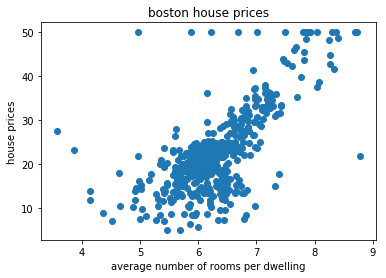

In [6]:
plt.scatter(X, y);
plt.title('boston house prices')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('house prices')
plt.show()

As mentioned previously, we’ll want to put a portion of the data aside for the final evaluation.

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

We’ll use cross validation to determine the optimal alpha value. By default, the ridge regression cross validation class uses the Leave One Out strategy (k-fold). We can compare the performance of our model with different alpha values by taking a look at the mean square error.

In [12]:
regressor = RidgeCV(alphas=[1, 1e3, 1e6], store_cv_values=True)

regressor.fit(train_X, train_y)

cv_mse = np.mean(regressor.cv_values_, axis=0)

print(cv_mse)

[43.62528861 73.00797598 85.55049598]


The RidgeCV class will automatically select the best alpha value. We can view it by accessing the following property.

In [13]:
# Best alpha
print(regressor.alpha_)

1.0


We can use the model to predict that house prices for the test set.

In [14]:
predict_y = regressor.predict(test_X)

Finally, we plot the data in the test set and the line determined during the training phase.

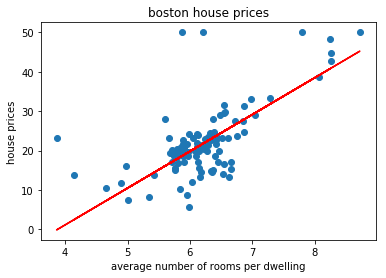

In [15]:
plt.scatter(test_X, test_y);
plt.plot(test_X, predict_y, color='red')
plt.title('boston house prices')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('house prices')
plt.show()